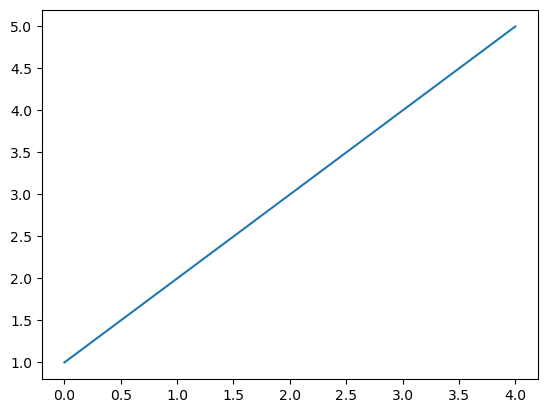

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])

In [3]:
# if torch and torchvision are not installed, execute the following lines:

# !pip install torch
# !pip install torchvision

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [6]:
# -------------------- Part 1: Introduction to Machine Learning and Neural Networks --------------------

# Part 1.2: Loading the MNIST Dataset
# Apply transformations to convert images to tensors and normalize them
# Pipeline of transformations, first to tensor (range 0 to +1), than normalize (-1 to +1)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [9]:
# Load the MNIST dataset for training and testing
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

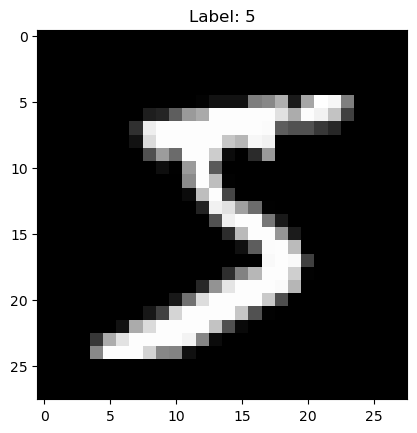

In [11]:
# Part 1.2: Visualize a sample image from MNIST
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f'Label: {label}')
plt.show()

In [13]:
# -------------------- Part 2: Setting Up the Environment & Loading MNIST --------------------

# Part 2.2: Use DataLoader to load data in mini-batches
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [15]:
# -------------------- Part 3: Building a Simple Neural Network --------------------

# Part 3.2: Define a Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # First hidden layer (input: 28x28=784, output: 128 neurons)
        self.fc1 = nn.Linear(28*28, 128)
        # Second hidden layer (input: 128, output: 64 neurons)
        self.fc2 = nn.Linear(128, 64)
        # Output layer (input: 64, output: 10 classes for digits 0-9)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        # Flatten the input image to a vector
        x = x.view(-1, 28*28)
        # Apply ReLU activation function to the first and second layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        # Output logits (raw scores)
        x = self.fc3(x)
        return x

In [17]:
# Instantiate the model
model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
# Part 3.4: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent (SGD)

In [21]:
# -------------------- Part 4: Training the Network --------------------

# Part 4.2: Train the Neural Network
epochs = 5  # Number of epochs
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        # Flatten the images to match the input size of the model
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()  # Zero out gradients from the previous step

        # Forward pass: Get model outputs
        # calls the forward method
        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate the loss

        # Backward pass: Compute gradients
        loss.backward()

        # Optimize: Update weights using gradients
        optimizer.step()

        # Track running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get the predicted class with max score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print loss and accuracy for this epoch
    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {accuracy:.2f}%')

Epoch 1, Loss: 0.7163102361281712, Accuracy: 80.65%
Epoch 2, Loss: 0.3178676306237777, Accuracy: 90.73%
Epoch 3, Loss: 0.264889742710193, Accuracy: 92.14%
Epoch 4, Loss: 0.2244691551764806, Accuracy: 93.38%
Epoch 5, Loss: 0.19331746243635814, Accuracy: 94.34%


In [22]:
# Part 4.5: Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved successfully!")

Model saved successfully!


In [43]:
# -------------------- Part 5: Evaluating the Model --------------------

# Part 5.2: Evaluate the model on the test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

In [45]:
# Disable gradient calculation for faster evaluation
with torch.no_grad():
    for images, labels in test_loader:
        # Flatten the images
        images = images.view(images.size(0), -1)
        # Get model predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [25]:
# Calculate test accuracy
test_accuracy = 100 * correct / total
print(f'Accuracy on the test set: {test_accuracy:.2f}%')

Accuracy on the test set: 94.85%


In [26]:
# Part 5.3: Visualize some predictions
images, labels = next(iter(test_loader))  # Get a batch of test images
images_flattened = images.view(images.size(0), -1)  # Flatten the images
outputs = model(images_flattened)
_, predicted = torch.max(outputs, 1)

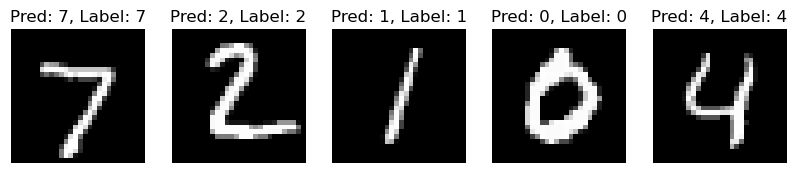

In [27]:
# Display first 5 images with predicted and true labels
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(f'Pred: {predicted[i]}, Label: {labels[i]}')
    axes[i].axis('off')
plt.show()

In [28]:
# Part 5.4: Identify and display misclassified images
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        images_flattened = images.view(images.size(0), -1)
        outputs = model(images_flattened)
        _, predicted = torch.max(outputs, 1)
        
        # Collect misclassified images
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i])
                misclassified_labels.append(labels[i])
                misclassified_predictions.append(predicted[i])

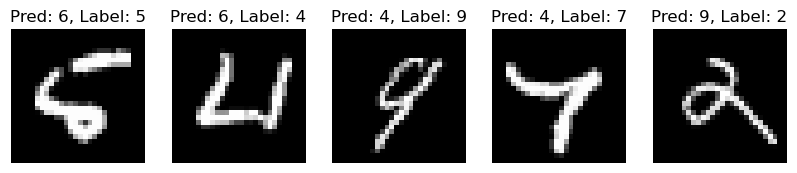

In [29]:
# Display first 5 misclassified images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(misclassified_images[i].squeeze(), cmap="gray")
    axes[i].set_title(f'Pred: {misclassified_predictions[i]}, Label: {misclassified_labels[i]}')
    axes[i].axis('off')
plt.show()

In [30]:
# (Optional) Load the saved model for future use
model = SimpleNN()  # Reinitialize the model
model.load_state_dict(torch.load('mnist_model.pth'))  # Load saved parameters
model.eval()  # Set to evaluation mode
print("Model reloaded successfully!")

Model reloaded successfully!


/var/folders/jd/j3sj61192kv0glm0cr3szzzh0000gn/T/ipykernel_14763/3730432065.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mnist_model